In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [16]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
dataset_dir_name = "../MangoLeafBD Dataset"

# Get the current directory of the Python script
current_directory = os.getcwd()

# Construct the full path to the CSV file
DATADIR = os.path.join(current_directory, dataset_dir_name)

# List directories in DATADIR
CATEGORIES = [d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))]
print(CATEGORIES)
IMG_SIZE = 100

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


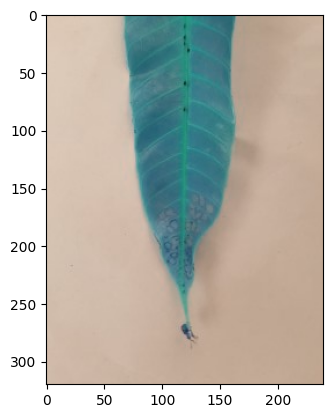

In [82]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [83]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [84]:
print(len(training_data))

4000


In [85]:
lenofimage = len(training_data)

In [86]:
X = []
y = []

for image_array, label in training_data:
    X.append(image_array)
    y.append(label)
X = np.array(X).reshape(lenofimage, -1)

In [87]:
X.shape

(4000, 30000)

**flattening the array**

In [88]:
X[1]

array([229, 214, 205, ..., 192, 167, 147], dtype=uint8)

max-scaling


In [89]:
X = X / 255.0

Ex. of flattened array...

In [90]:
X[1]

array([0.89803922, 0.83921569, 0.80392157, ..., 0.75294118, 0.65490196,
       0.57647059])

note : y should be in array form compulsory.


In [91]:
y = np.array(y)

In [92]:
y.shape

(4000,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**bayesian**

In [94]:
bayesian = GaussianNB()
bayesian.fit(X_train, y_train)
y_pred = bayesian.predict(X_test)

In [95]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.5525


In [96]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.54      0.64      0.58       103
           1       0.70      0.73      0.72        94
           2       0.69      0.73      0.71       103
           3       0.57      0.42      0.48        96
           4       0.50      0.42      0.45        89
           5       0.49      0.70      0.57       109
           6       0.50      0.55      0.52        98
           7       0.40      0.23      0.29       108

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.54       800
weighted avg       0.55      0.55      0.54       800



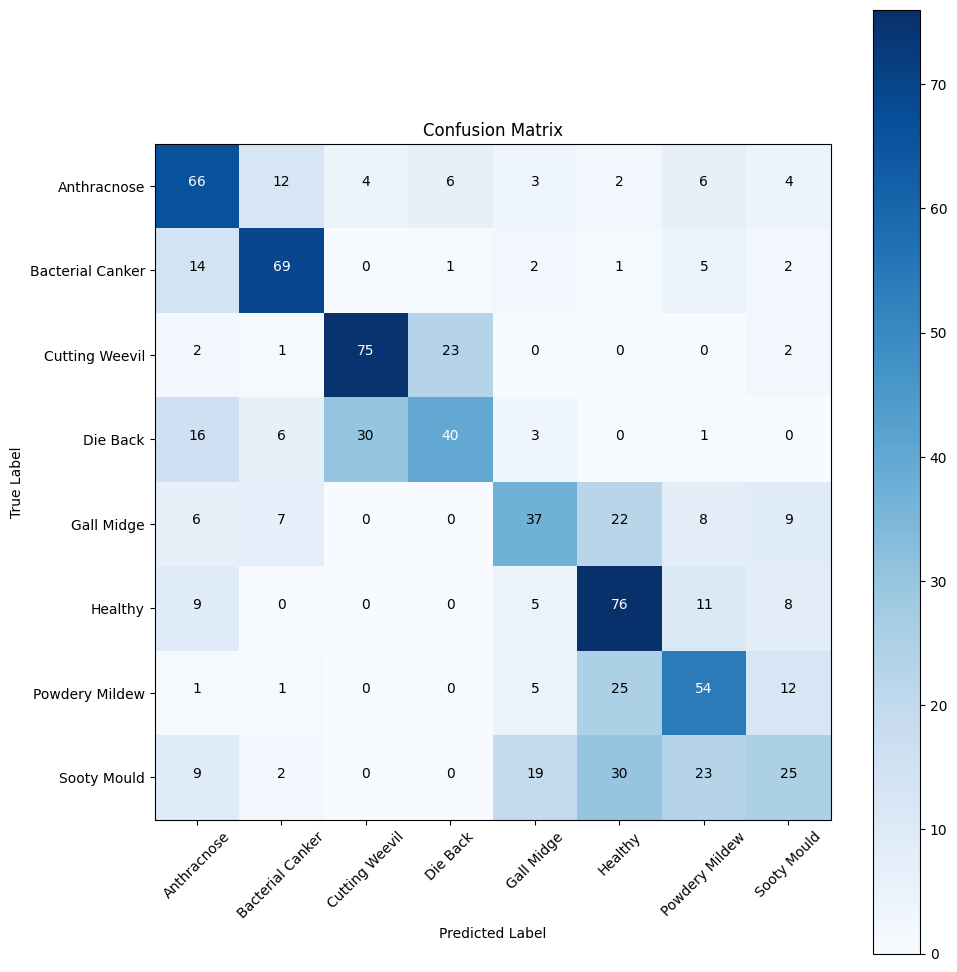

In [97]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using extracted **features** instead of image array for the model

In [88]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
csv_file_name = "../features/edges.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path, index_col=0)

# Assuming 'classlabel' is the column containing the class labels
X = data.drop("classlabel", axis=1)  # Extract features by dropping the label column
y = data["classlabel"]  # Extract labels
# Convert the data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [89]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
y

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**fitting our data in SVM model**

In [92]:
bayesian = GaussianNB()
bayesian.fit(
    X_train,
    y_train,
)

GaussianNB()

**predicting the X_test**

In [93]:
y_pred = bayesian.predict(X_test)

Evaluation 

In [94]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.325


In [95]:
print("Accuracy on unknown data is\n", classification_report(y_test, y_pred))

Accuracy on unknown data is
               precision    recall  f1-score   support

           0       0.18      0.20      0.19       121
           1       0.22      0.12      0.16        88
           2       0.55      0.75      0.64        99
           3       0.31      0.56      0.40       107
           4       0.30      0.23      0.26        83
           5       0.33      0.26      0.29       100
           6       0.21      0.13      0.16       103
           7       0.37      0.33      0.35        99

    accuracy                           0.33       800
   macro avg       0.31      0.32      0.31       800
weighted avg       0.31      0.33      0.31       800



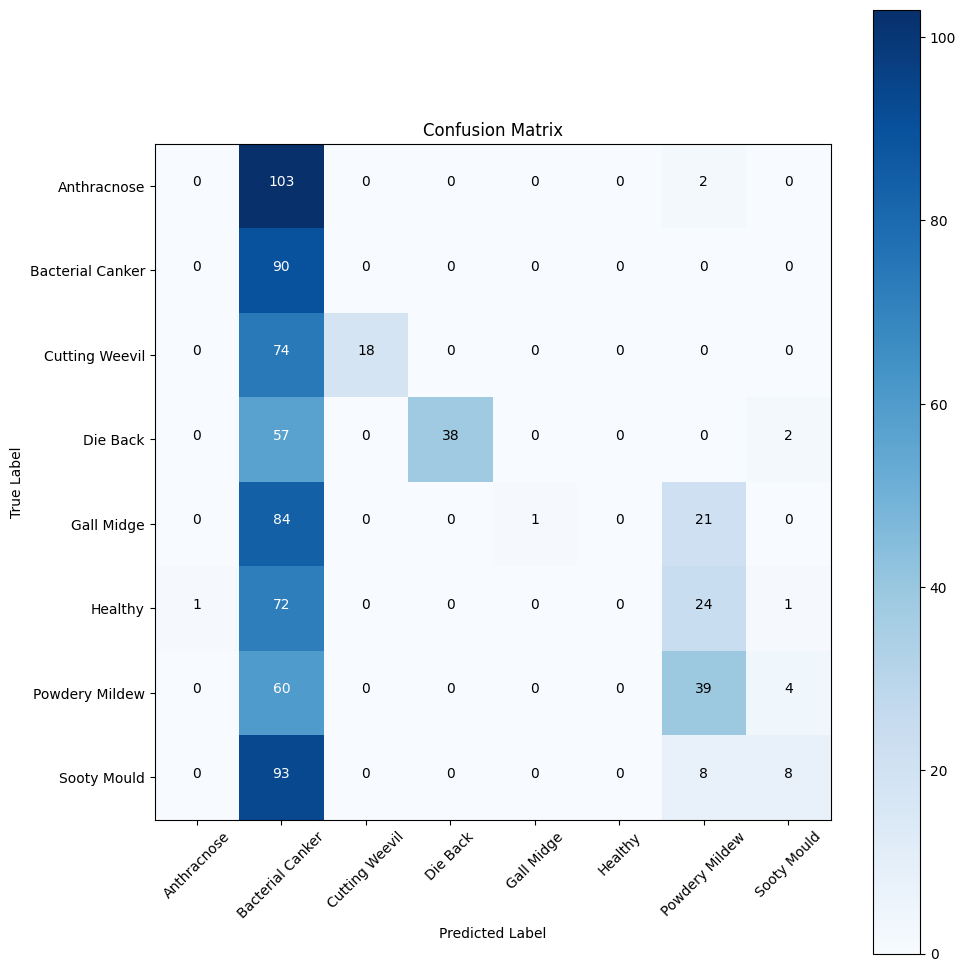

In [87]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()